## 2. Emission Line Kinematics

This notebook is for plotting maps of the emission lines fit using `PPXF` (the process for which is described in Notebook 0). We plot flux maps for `Halpha, Hbeta, and NII`. We also plot maps of the `gas velocity` and `gas velocity dispersion`.

In [1]:
path_to_beads = '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/'

In [2]:
#system
from __future__ import division
import sys

#numpy
import numpy as np

import h5py

#matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
%matplotlib inline

#astropy
from astropy.wcs import WCS
import astropy.units as u

#seaborn
import seaborn as sns 

import importlib


In [3]:
#import my own functions: you can see them in full in the utils folder
util_path = path_to_beads + 'Notebooks/Beads20/utils/'
sys.path.append(util_path)

import plotting_functions as pf
import science_functions as sf

block_reduce was moved to the astropy.nddata.blocks module.  Please update your import statement.


In [4]:
#uncomment if need to reload module
importlib.reload(sf)

<module 'science_functions' from '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Notebooks/Beads20/utils/science_functions.py'>

In [5]:
#paths
fig_path = path_to_beads + 'Figures/paper/'
gmos_data_directory = path_to_beads + 'Analysis/gmosBeads/'

In [6]:
#About the galaxy cluster
sf.sdss1531_dict

{'name': 'SDSS J1531+3414',
 'ra': 232.7936938,
 'dec': 34.2404172,
 'radius': 2.5,
 'z': 0.335,
 'cz': 100430.47}

In [7]:
#plot style
pf.styleplots()

### Plot PPXF Emission Lines

In [8]:
#Load Field of View Cube
fov = gmos_data_directory + 'reduced/SDSSJ1531+3414.acube.fits'
hdu, hdr, w = pf.open_fits(fov, naxis=2)

In [9]:
# Loading ppxf output for 1- and 2-Gaussian fit
save_path = ''.join((path_to_beads,'Analysis/gmosBeads/ppxf/fit_results/result_table/'))
filename = save_path + '2_ppxffit.hdf5'
f = h5py.File(filename, 'r')

In [10]:
masked_Ha_flux, Ha_mask = sf.ppx_masked_flux_maps(f, 'Ha')
masked_Hb_flux, Hb_mask = sf.ppx_masked_flux_maps(f, 'Hb')
masked_NII6548_flux, NII6548_mask = sf.ppx_masked_flux_maps(f, 'NII6548')
masked_NII6583_flux, NII6583_mask = sf.ppx_masked_flux_maps(f, 'NII6583')
masked_OIII5007_flux, OIII5007_mask = sf.ppx_masked_flux_maps(f, 'OIII5007')

dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.


In [11]:
#plot HST on top
hst_hdr, hst_wcs, hst_hdu = sf.load_HST_data(path_to_beads)
ysc_coords = sf.ysc_load(path_to_beads)
hst_cont_color, ysc_color = 'k', 'cyan'


The following kwargs were not used by contour: 'aspect'
The following kwargs were not used by contour: 'rasterized'
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


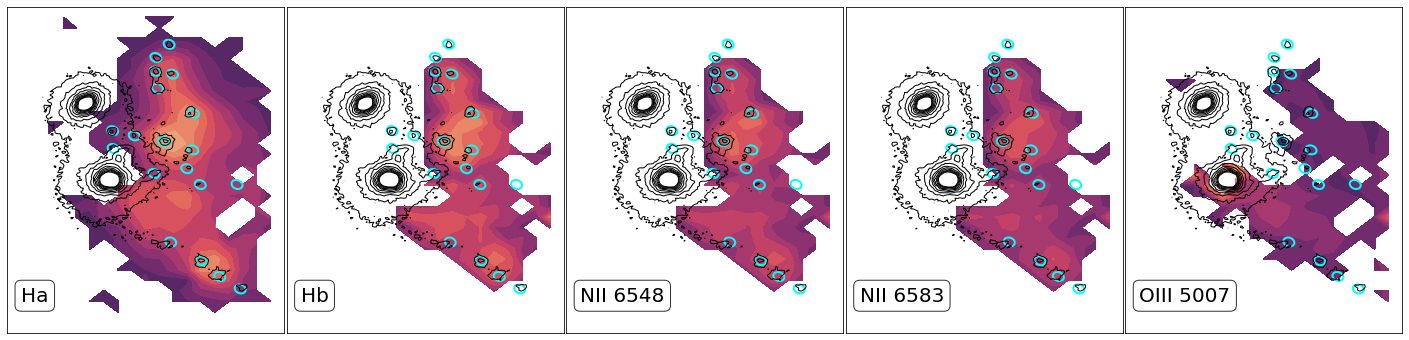

In [44]:
fig = plt.figure(figsize=(25, 6))
gs1 = GridSpec(1, 5)
gs1.update(wspace=0.01)

clims=[[0, 0.02], [0, 0.01], [0, 0.003], [0, 0.01], [0, 0.008]]
cmap=sns.color_palette("flare_r", as_cmap=True)
maps = [masked_Ha_flux, masked_Hb_flux, masked_NII6548_flux, 
        masked_NII6583_flux, masked_OIII5007_flux]
map_names = ['Ha', 'Hb', 'NII 6548', 'NII 6583', 'OIII 5007']

for idm, map in enumerate(maps):

    clim = clims[idm]

    ax = fig.add_subplot(gs1[idm], projection=w)
    ax = pf.ax_fits_map(hdu=None, data=map, hdr=hdr,
                            vmin=clim[0], vmax=clim[1], cmap=cmap, 
                            coords=None, ax=ax, contour=True, 
                            clip=None, lw=5, cbar=False, wcs=w)

    ##HST Contours: uncomment below lines if not in rush
    pf.overlay(ax, hst_hdu, 1, vmin=0.05, vmax=0.5, nlev=10, contours=True, 
                cont_color=hst_cont_color, lw=1)

    #YSC Overlay
    pf.overlay(ax, None, 1, None, None, clusters=True, cont_color=ysc_color, 
                ysc_coords=ysc_coords)
    pf.hide_plot_labels(ax, hdr, hidey=1)
    pf.hide_plot_labels(ax, hdr, hidex=1)
    ax.set_xlim(20,0)
    ax.set_ylim(31, 0)

    props = dict(boxstyle='round', facecolor='w', alpha=0.8)
    ax.text(19, 28, map_names[idm], color='k', bbox=props, fontsize=20)

fig.tight_layout()
fig.savefig(fig_path + "gmos_spectrum_maps.pdf", bbox_inches='tight')


In [46]:
masked_vel_map, masked_fwhm_map = sf.ppx_masked_vel_maps(f, Ha_mask)

The following kwargs were not used by contour: 'aspect'
The following kwargs were not used by contour: 'rasterized'


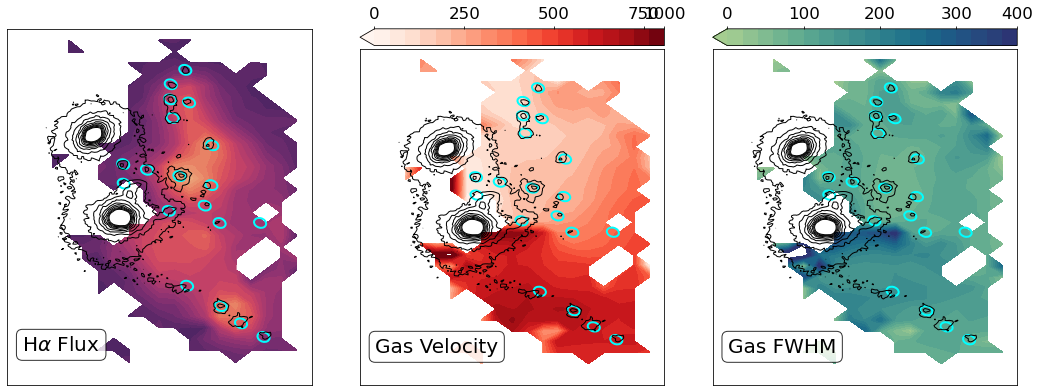

In [66]:
fig = plt.figure(figsize=(15, 6))
gs1 = GridSpec(1, 3)

clims=[[0, 0.02], [0, 850], [0, 400]]
cmaps = [sns.color_palette("flare_r", as_cmap=True), 
            cm.Reds, sns.color_palette("crest", as_cmap=True)]
cbars=[False, True, True]
maps = [masked_Ha_flux, masked_vel_map + 300, masked_fwhm_map]
map_names = [r'H$\alpha$ Flux', 'Gas Velocity', 'Gas FWHM']

for idm, map in enumerate(maps):

    clim = clims[idm]
    cmap=cmaps[idm]
    cbar=cbars[idm]

    ax = fig.add_subplot(gs1[idm], projection=w)
    ax = pf.ax_fits_map(hdu=None, data=map, hdr=hdr, nlevels=20,
                            vmin=clim[0], vmax=clim[1], cmap=cmap, 
                            coords=None, ax=ax, contour=True, 
                            clip=None, lw=5, cbar=cbar, wcs=w)

    ##HST Contours: uncomment below lines if not in rush
    pf.overlay(ax, hst_hdu, 1, vmin=0.05, vmax=0.5, nlev=10, contours=True, 
                cont_color=hst_cont_color, lw=1)

    #YSC Overlay
    pf.overlay(ax, None, 1, None, None, clusters=True, cont_color=ysc_color, 
                ysc_coords=ysc_coords)
    pf.hide_plot_labels(ax, hdr, hidey=1)
    pf.hide_plot_labels(ax, hdr, hidex=1)

    ax.set_xlim(20,0)
    ax.set_ylim(31, 0)
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.8)
    ax.text(19, 28, map_names[idm], color='k', bbox=props, fontsize=20)

fig.tight_layout()
fig.savefig(fig_path + "gmos_halpha_maps.pdf", bbox_inches='tight')